## Описание данных  
---
Таблица users (информация о пользователях):
-    `user_id` — уникальный идентификатор пользователя;
-    `first_name` — имя пользователя;
-    `last_name` — фамилия пользователя;
-    `age` — возраст пользователя (годы);
-   `reg_date` — дата подключения тарифа (день, месяц, год);
-    `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
-    `city` — город проживания пользователя;
-    `tariff` — название тарифного плана.

Таблица calls (информация о звонках):

-    `id` — уникальный номер звонка;
-    `call_date` — дата звонка;
-    `duration` — длительность звонка в минутах;
-    `user_id` — идентификатор пользователя, сделавшего звонок.

Таблица messages (информация о сообщениях):

-    `id` — уникальный номер сообщения;
-    `message_date` — дата сообщения;
-    `user_id` — идентификатор пользователя, отправившего сообщение.

Таблица internet (информация об интернет-сессиях):

-    `id` — уникальный номер сессии;
-    `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
-    `session_date` — дата интернет-сессии;
-    `user_id` — идентификатор пользователя.

Таблица tariffs (информация о тарифах):

-    `tariff_name` — название тарифа;
-    `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
-    `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
-    `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
-    `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
-    `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
-    `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
-    `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Data/da-2-users.csv')

In [ ]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users = users.drop(['age','first_name', 'last_name'], axis = 1)

In [ ]:
users.head()

,user_id,churn_date,city,reg_date,tariff
0,1000,NaN,Краснодар,2018-05-25,ultra
1,1001,NaN,Москва,2018-11-01,smart
2,1002,NaN,Стерлитамак,2018-06-17,smart
3,1003,NaN,Москва,2018-08-17,ultra
4,1004,NaN,Новокузнецк,2018-05-14,ultra


In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   churn_date  38 non-null     datetime64[ns]
 2   city        500 non-null    object        
 3   reg_date    500 non-null    datetime64[ns]
 4   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 19.7+ KB


Удаляю бесполезные столбцы, привожу столбцы с датами к типу дейттайм, пропуски пока не заполняю.

In [ ]:
calls = pd.read_csv('/content/drive/MyDrive/Data/da-2-calls.csv')

In [ ]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
calls['duration'] = np.ceil(calls['duration']).astype('int64')

In [ ]:
calls['call_date'] = pd.to_datetime( calls['call_date'], format = '%Y-%m-%d')

In [ ]:
calls = calls.drop(['id'], axis = 1)

Округляю длительность звонков вверх до минуты (по правилам оператора) и привожу их к типу инт, привожу столбец с датами к типу дейттайм. Удаляю бесполезный айди звонка.

In [ ]:
calls['month'] = calls['call_date'].dt.month

In [ ]:
calls['call_date'].dt.year.unique()

array([2018])

In [ ]:
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])

In [ ]:
calls_pivot = calls_pivot.reset_index()

In [ ]:
calls_pivot.columns = ['user_id', 'month', 'calls_duration', 'calls_count']

In [ ]:
calls_pivot.head()

,user_id,month,calls_duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [ ]:
calls = calls_pivot.pivot_table(index = 'user_id', values = ['calls_duration', 'calls_count'], aggfunc = 'mean')

In [ ]:
calls = calls.reset_index()

In [ ]:
calls.head()

,user_id,calls_count,calls_duration
0,1000,46.0,320.750000
1,1001,61.0,422.000000
2,1002,31.0,216.714286
3,1003,104.0,764.400000
4,1004,22.0,123.375000


Делаю таблицу со среднемесячным количеством звонков и длителностью звонков для каждого пользователя.

In [ ]:
messages = pd.read_csv('/content/drive/MyDrive/Data/da-2-messages.csv')

In [ ]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [ ]:
messages = messages.drop(['id'], axis = 1)

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_date  123036 non-null  datetime64[ns]
 1   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


Привожу столбец с датами к типу дейттайм, удаля. бесполезный столбец с айди сообщения.

In [ ]:
messages.head()

,message_date,user_id
0,2018-06-27,1000
1,2018-10-08,1000
2,2018-08-04,1000
3,2018-06-16,1000
4,2018-12-05,1000


In [ ]:
messages['month'] = messages['message_date'].dt.month

In [ ]:
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')

In [ ]:
messages_pivot = messages_pivot.reset_index()

In [ ]:
messages = messages_pivot.pivot_table(index = 'user_id', values = 'message_date', aggfunc = 'mean')

In [ ]:
messages = messages.reset_index()

In [ ]:
messages.columns = ['user_id', 'messages_count']

In [ ]:
messages.head()

,user_id,messages_count
0,1000,62.0
1,1002,10.0
2,1003,76.0
3,1004,149.0
4,1005,46.0


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         426 non-null    int64  
 1   messages_count  426 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.8 KB


Делаю таблицу с среднемесячным количеством отправляемых пользователем сообщений.

In [ ]:
internet = pd.read_csv('/content/drive/MyDrive/Data/da-2-internet.csv')

In [ ]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet = internet.drop(['Unnamed: 0', 'id'], axis = 1)

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   mb_used       149396 non-null  float64
 1   session_date  149396 non-null  object 
 2   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int64')

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       149396 non-null  int64         
 1   session_date  149396 non-null  datetime64[ns]
 2   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.4 MB


Удаляю ошибочный столбец с индексами, бесполезный столбец с айди сессии. Привожу столбец с датами к типу дейттайм, округляю мегабайты до целого значения вверх (по правилам оператора).

In [ ]:
internet.head()

,mb_used,session_date,user_id
0,113,2018-11-25,1000
1,1053,2018-09-07,1000
2,1198,2018-06-25,1000
3,551,2018-08-22,1000
4,303,2018-09-24,1000


In [ ]:
internet['month'] = internet['session_date'].dt.month

In [ ]:
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [ ]:
internet_pivot = internet_pivot.reset_index()

In [ ]:
internet = internet_pivot.pivot_table(index = 'user_id', values = 'mb_used', aggfunc = 'mean')

In [ ]:
internet = internet.reset_index()

In [ ]:
internet.head()

,user_id,mb_used
0,1000,13436.500000
1,1001,16252.500000
2,1002,16597.571429
3,1003,11465.800000
4,1004,18646.500000


Делаю таблицу по среднему трафику в месяц для каждого пользователя.

In [ ]:
tariffs = pd.read_csv('/content/drive/MyDrive/Data/da-2-tariffs.csv')

In [ ]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs['tariff'] = tariffs['tariff_name']

In [ ]:
tariffs = tariffs.drop('tariff_name', axis = 1)

In [ ]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переименовываю столбец для дальнейшего склеивания с юзерс.

In [ ]:
users = users.merge(tariffs, on = 'tariff', how = 'left')

In [ ]:
users.head()

,user_id,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,NaT,Москва,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,NaT,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,NaT,Новокузнецк,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
calls_pivot.head()

,user_id,month,calls_duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [ ]:
internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [ ]:
messages_pivot.head()

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [ ]:
messages_pivot.columns = ['user_id', 'month', 'messages_count']

In [ ]:
stat = calls_pivot.merge(messages_pivot, on = ['user_id', 'month'], how = 'left')

In [ ]:
stat = stat.merge(internet_pivot, on = ['user_id', 'month'], how = 'left')

Объединяю три таблицы в одну по месяцу и юзер_айди.

In [ ]:
stat.head()

,user_id,month,calls_duration,calls_count,messages_count,mb_used
0,1000,5,159,22,22.0,2256.0
1,1000,6,172,43,60.0,23257.0
2,1000,7,340,47,75.0,14016.0
3,1000,8,408,52,81.0,14070.0
4,1000,9,466,58,57.0,14581.0


In [ ]:
users.head()

,user_id,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,NaT,Москва,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,NaT,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,NaT,Новокузнецк,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
users = users.merge(stat, on = 'user_id')

Объединяю юзерс и статс, получаю таблицу со всеми пользователями и данными их трат по месяцам.

In [ ]:
print(f'Количество пользователей: {users.user_id.nunique()}')

Количество пользователей: 492


In [ ]:
users['calls_count'] = users['calls_count'].fillna(0)
users['messages_count'] = users['messages_count'].fillna(0)
users['mb_used'] = users['mb_used'].fillna(0)

In [ ]:
users.dropna(subset = ['calls_duration'], inplace = True)

Удаляю строки со звонками длительностью 0, так как это, вероятно, пропущенные или входящие звонки.

Все склеил, заполнил пустые значения нулями, так как некоторые пользователи не пользовались некоторыми услугами.

In [ ]:
users = users.drop(['churn_date', 'reg_date'], axis = 1)

Удаляю лишние столбцы, чтобы удобнее было работать.

In [ ]:
users[['messages_count', 'mb_used']] = users[['messages_count', 'mb_used']].astype('int64')

## Анализ данных

In [ ]:
users.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,calls_count,messages_count,mb_used
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5,159,22,22,2256
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6,172,43,60,23257
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7,340,47,75,14016
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8,408,52,81,14070
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9,466,58,57,14581


In [ ]:
smart = users.loc[users['tariff'] == 'smart'].copy()

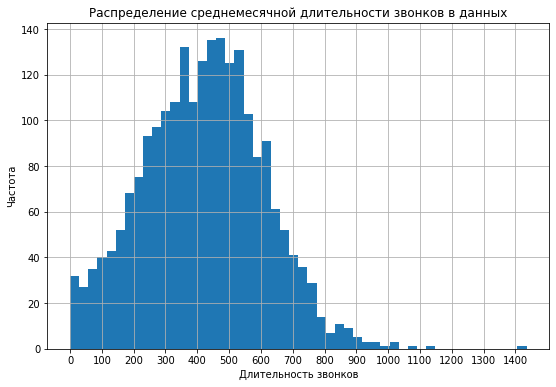

In [ ]:
plot = smart['calls_duration'].plot(kind = 'hist', grid = True, bins = 50, xticks = range(0,1500,100), figsize = (9,6),
                                   title = 'Распределение среднемесячной длительности звонков в данных')
plot.set_xlabel('Длительность звонков')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
smart.pivot_table(index = 'tariff', values = 'calls_duration', aggfunc = ['var', 'std', 'mean'])

,var,std,mean
,calls_duration,calls_duration,calls_duration
tariff,,,
smart,35844.189551,189.325618,419.062978


По длительности звонков для тарифа смарт имею близкое к нормальному распределению, с самым частым значением ~460, средним 419, дисперсией 35844, стандартным отклонением 189.

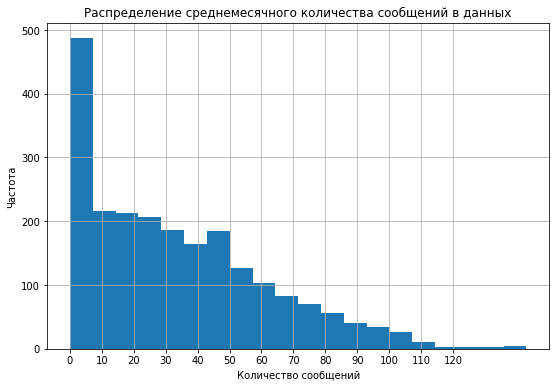

In [ ]:
plot = smart['messages_count'].plot(kind = 'hist', grid = True, bins = 20, xticks = range(0,130,10), figsize = (9,6),
                                   title = 'Распределение среднемесячного количества сообщений в данных')
plot.set_xlabel('Количество сообщений')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
smart.pivot_table(index = 'tariff', values = 'messages_count', aggfunc = ['mean', 'std', 'var'])

,mean,std,var
,messages_count,messages_count,messages_count
tariff,,,
smart,33.396311,28.259437,798.595792


Среднее 33, дисперсия 798, отклонение 28

По количеству сообщений для тарифа смарт имею что-то похожее на распределение Пуассона, со средним 32, дисперсией 699, стандарным отклонением 26.

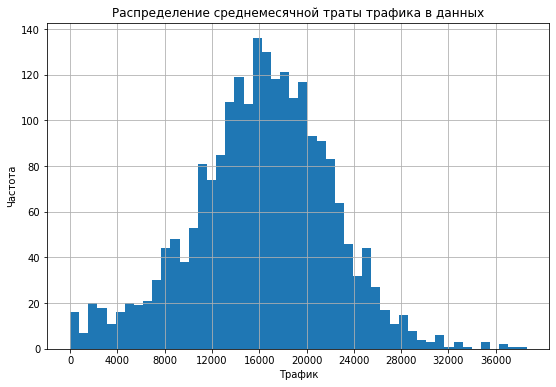

In [ ]:
plot = smart['mb_used'].plot(kind = 'hist', grid = True, bins = 50, xticks = range(0,40000,4000), figsize = (9,6),
                                   title = 'Распределение среднемесячной траты трафика в данных')
plot.set_xlabel('Трафик')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
smart.pivot_table(index = 'tariff', values = 'mb_used', aggfunc = ['mean', 'std', 'var'])

,mean,std,var
,mb_used,mb_used,mb_used
tariff,,,
smart,16230.166892,5883.363044,3.461396e+07


Для среднемесячной траты трафика для тарифа смарт имею распределение, похожее на нормальное, со средним 16230, дисперсией 34613960 и стандартным отклонением 5883

In [ ]:
ultra = users.loc[users['tariff'] == 'ultra'].copy()

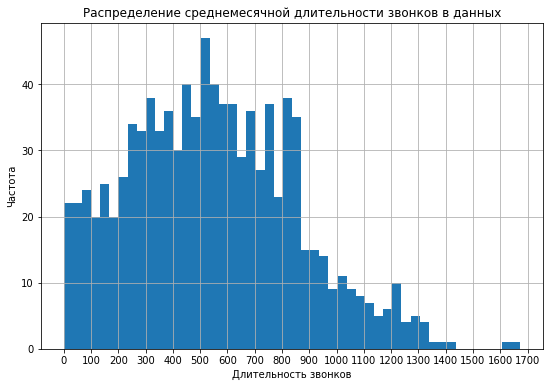

In [ ]:
plot = ultra['calls_duration'].plot(kind = 'hist', grid = True, bins = 50, xticks = range(0,1800,100), figsize = (9,6),
                                   title = 'Распределение среднемесячной длительности звонков в данных')
plot.set_xlabel('Длительность звонков')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
ultra.pivot_table(index = 'tariff', values = 'calls_duration', aggfunc = ['mean', 'std', 'var'])

,mean,std,var
,calls_duration,calls_duration,calls_duration
tariff,,,
ultra,545.451104,306.925754,94203.418396


По длительности звонков для тарифа ультра распределение крайне неравномерно, хотя самое частое значение так же ~460. Имеем среднее 545, дисперсию 94203, отклонение 306.

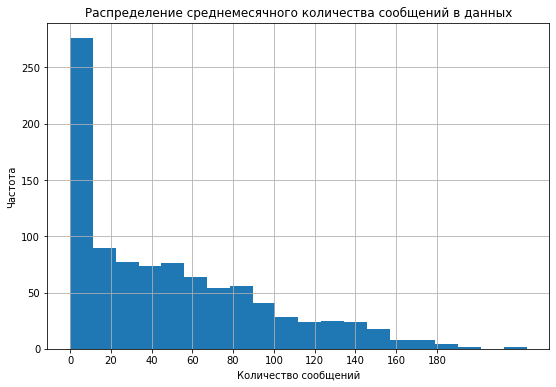

In [ ]:
plot = ultra['messages_count'].plot(kind = 'hist', grid = True, bins = 20, xticks = range(0,200,20), figsize = (9,6),
                                   title = 'Распределение среднемесячного количества сообщений в данных')
plot.set_xlabel('Количество сообщений')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
ultra.pivot_table(index = 'tariff', values = 'messages_count', aggfunc = ['mean', 'std', 'var'])

,mean,std,var
,messages_count,messages_count,messages_count
tariff,,,
ultra,49.033649,46.890656,2198.733603


Для сообщений тарифа ультра имеем распределение, похожее на Пуассоновское, среднее 49, дисперсия 2198, отклонение 46.

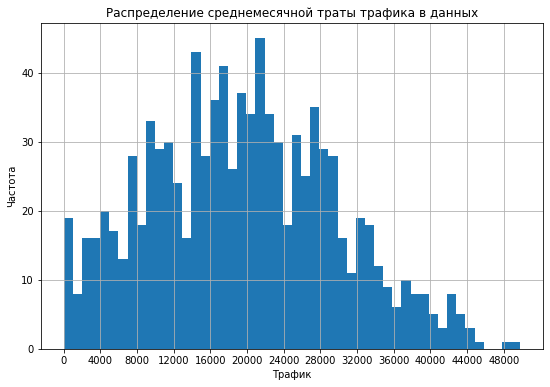

In [ ]:
plot = ultra['mb_used'].plot(kind = 'hist', grid = True, bins = 50, xticks = range(0,50000,4000), figsize = (9,6),
                                   title = 'Распределение среднемесячной траты трафика в данных')
plot.set_xlabel('Трафик')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
ultra.pivot_table(index = 'tariff', values = 'mb_used', aggfunc = ['mean', 'std', 'var'])

,mean,std,var
,mb_used,mb_used,mb_used
tariff,,,
ultra,19480.54469,10135.971146,1.027379e+08


Для тарифа ультра распределение трафика так же неравномерно, среднее 19480, дисперсия 102737900, отклонение 10135,.

In [ ]:
def income(row):
    minutes = row['calls_duration'] - row['minutes_included']
    if minutes > 0:
        minutes_profit = minutes * row['rub_per_minute']
    else:
        minutes_profit = 0
    messages = row['messages_count'] - row['messages_included']
    if messages > 0:
        messages_profit = messages * row['rub_per_message']
    else:
        messages_profit = 0
    mbytes = row['mb_used'] - row['mb_per_month_included']
    if mbytes > 0:
        mbytes_profit = mbytes * row['rub_per_gb'] / 1000
    else:
        mbytes_profit = 0
    profit = minutes_profit + messages_profit + mbytes_profit + row['rub_monthly_fee']
    return profit

Функция принимает на вход строку дф, вычитает из значения потраченного ресурса значение допуска, если полученное значение больше нуля (допуск превышен), остаток умножается на стоимость ресурса, получается значение выгоды для ресурса, в ином случае присваивает ноль. В конце все выгоды для каждого ресурса складываются вместе со стоимостью тарифа. 

In [ ]:
users.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,calls_count,messages_count,mb_used
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5,159,22,22,2256
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6,172,43,60,23257
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7,340,47,75,14016
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8,408,52,81,14070
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9,466,58,57,14581


In [ ]:
users['income'] = users.apply(income, axis = 1)

In [ ]:
users.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,calls_count,messages_count,mb_used,income
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5,159,22,22,2256,1950.0
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6,172,43,60,23257,1950.0
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7,340,47,75,14016,1950.0
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8,408,52,81,14070,1950.0
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9,466,58,57,14581,1950.0


Получил таблицу с доходом по месяцам для каждого пользователя.

In [ ]:
smart = users[users['tariff'] == 'smart'].copy()

In [ ]:
smart['income'].mean()

1247.29509671615

In [ ]:
ultra = users[users['tariff'] == 'ultra'].copy()

In [ ]:
ultra['income'].mean()

2064.146529968455

## Проверка гипотез

Формулирую нулевую гипотезу: среднее обоих генеральных совокупностей (для выборок смарт и ультра) равны.

Необходимо определить - различается ли средняя выручка пользователей тарифов смарт и ультра.
Нулевая гипотеза должна иметь знак равенства, следуя из этого считаю:
- нулевой гипотезой: средние выручки пользователей тарифов смарт и ультра равны;
- альтернативной гипотезой: средние выручки пользователей тарифов смарт и ультра НЕ равны;

In [ ]:
smart['income'].var()

647065.7148589327

In [ ]:
ultra['income'].var()

135489.8906405792

In [ ]:
results = st.ttest_ind(smart['income'], ultra['income'], equal_var = False)
results.pvalue

1.3731902297504665e-274

p-значение очень маленькое, отвергаю нулевую гипотезу.

In [ ]:
users.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,calls_count,messages_count,mb_used,income
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5,159,22,22,2256,1950.0
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6,172,43,60,23257,1950.0
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7,340,47,75,14016,1950.0
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8,408,52,81,14070,1950.0
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9,466,58,57,14581,1950.0


In [ ]:
moscow = users[users['city'] == 'Москва'].copy()

In [ ]:
others = users[users['city'] != 'Москва'].copy()

Формулирую нулевую гипотезу: среднее двух генеральных совокупностей (для выборок Москва и остальные) равны.

Необходимо определить - различается ли средняя выручка пользователей из Москвы и остальных городов.
Нулевая гипотеза должна иметь знак равенства, следуя из этого считаю:
- нулевой гипотезой: средние выручки пользователей из Москвы и остальных городов равны;
- альтернативной гипотезой: средние выручки пользователей из Москвы и остальных городов НЕ равны.

In [ ]:
others['income'].mean()

1486.5342238689552

In [ ]:
moscow['income'].mean()

1515.191147540983

In [ ]:
others['income'].var()

651464.2813828957

In [ ]:
moscow['income'].var()

559628.138098844

In [ ]:
results = st.ttest_ind(moscow['income'], others['income'], equal_var = False)
results.pvalue

0.4026545242953605

Получаем p-значение равное 40%, нет оснований отвергать нулевую гипотезу.

Нулевая гипотеза подтвердилась. Средние значения отличаются на 38, а с вероятностью 59% такое различие можно получить случайно.

## Вывод

В процессе исследования были выполнены следующие работы:

### Предобработка данных:

- данные переведены в соответствующий им формат;
- округлены в верхнюю сторону длительность звонков и трафик, в соответствии с правилами оператора;
- данные очищены от значений не нужных для проведения исследования;
- удален ошибочный столбец с индексами;
- удалены строки с нулевым значением длительности звонков, так как, предположительно, это входящие вызовы или пропущенные.

Подготовка данных:
- сформирована таблица с данными по тратам ресурсов тарифа для каждого пользователя по месяцам;
- рассчитан доход для каждого пользователя по месяцам.

### Анализ данных:

Среднемесячная длительность звонков:

Для тарифа смарт получил нормальное распределение со следующими характеристиками:
- среднее - 419;
- стандартное отклонение 189.

Для тарифа ультра получил неравномерное распределение со следующими характеристиками:
- среднее 545;
- стандартное отклонение 306.

Среднемесячный расход сообщений:

Для тарифа смарт получил распределение Пуассона со следующими характеристиками:
- среднее - 33;
- стандартное отклонение - 28.

Для тарифа ультра получил распределение Пуассона со следующими характеристиками:
- среднее - 49;
- стандартное отклонение - 46.

Среднемесячный расход трафика:

Для тарифа смарт получил нормальное распределение со следующими характеристиками:
- среднее - 16230;
- стандартное отклонение - 5882.

Для тарифа ультра получили неравномерное распределение со следующими характеристиками:
- среднее - 19480;
- стандартное отклонение - 10130.

В целом заметна разница по использованию абонентами предоставленных ресурсов: пользователи тарифа ультра тратят больше ресурсов, чем пользователи тарифа смарт. При этом обнаружено:
- пользователи тарифа ультра в среднем используют предоставленные ресурсы не полностью (остается довольно много неиспользованных сообщений, минут, трафика);
- пользователи тарифа смарт в среднем превышают предоставленное количество трафика, что приносит дополнительный доход за счет платы за дополнительный трафик.

### Проверка гипотез:

Сформулированы гипотезы для дохода по тарифам:
- нулевая: средние выручки пользователей тарифов смарт и ультра равны;
- альтернативная: средние выручки пользователей тарифов смарт и ультра НЕ равны;

В результате теста:
Нулевая гипотеза не подтвердилась, p-value имеет крайне низкое значение (10 в минус 274 степени), что говорит о крайней низкой вероятности правдивости нулевой гипотезы. Отвергаем её.

Сформулированы гипотезы для дохода по городам:
- нулевая: средние выручки пользователей из Москвы и остальных городов равны;
- альтернативная: средние выручки пользователей из Москвы и остальных городов НЕ равны;

В результате теста:
Нулевая гипотеза подтвердилась, p-value имеет значение 40%, которое говорит о том, что хотя средние значения и различаются, с вероятностью 59% такое различие можно встретить случайно.